<a href="https://colab.research.google.com/github/Tefong35/TefongEugene/blob/main/Projet_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#n=1000
#l=[]
#while (1):
#  #n+=1000
#  l.append("1")

# Accident Routiers en France
**Objectif: Prédire la gravité des accidents routiers en France.**


# Classification Multiclasse/Binaire - Analyse Factorielle

>



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
!pip install factor_analyzer

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 23.6 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=ce9d12fd8c4a4eabc9d6de88c8833e272f539d3c59a95e38339365f690539fe1
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [ ]:
# Importer le jeu données
dataset = pd.read_csv("/content/drive/MyDrive/Projet_DataScientest/001_df_processed_nogps.csv", low_memory=False) #, na_values=["-1"]
dataset_reduit,_=train_test_split(dataset,train_size=0.4,random_state=42)
dataset_reduit.head()

,Num_Acc,grav,num_veh,lum,agg,age,Casque,Ceinture,Dispositif_Enfant,Equipement_Réfléchissant,...,region_Corse,region_Grand Est,region_Hauts-de-France,region_Normandie,region_Nouvelle-Aquitaine,region_Occitanie,region_Outre-Mer,region_Pays de la Loire,region_Provence-Alpes-Côte d'Azur,region_Île-de-France
1180210,201100052043,1.0,A01,False,True,37.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1981261,201700047177,1.0,B01,False,False,44.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1902175,201700011383,1.0,B01,False,False,24.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
811605,200900030569,4.0,A01,False,False,37.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
86827,200500038464,3.0,B02,True,False,35.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
dataset_new = dataset_reduit.copy()

In [ ]:
dataset_new['grav'] = dataset_new['grav'].replace({1:"0",2:"3",3:"2",4:"1"}).astype(int)
dataset_new = dataset_new.sort_values(by='grav')
y = dataset_new['grav']
y_multiclass = y     # np.array(y).ravel()
y_b =y.replace({0:'0',1:'0',2:'1',3:'1'}).astype(int)
y_binary = y_b #np.array(y_b).ravel()
#target=target.apply(lambda x: 1 if (x==2 or x==3) else 0)
drop_var = ['grav','num_veh','date','Num_Acc', "age", "lum", "agg"]
X = dataset_new.drop(drop_var, axis=1)

In [ ]:
dataset_new.shape

(1003864, 93)

Sampling Adequacy - Kaiser-Meyer-Olkin (KMO) **test**

In [ ]:
#Sampling Adequacy - Kaiser-Meyer-Olkin (KMO) test

#Le test KMO mesure l’adéquation des données à l’analyse factorielle.
#Il détermine l'adéquation pour chaque variable observée et pour le modèle complet.
#KMO estime la proportion de variance entre toutes les variables observées. Une proportion plus faible convient mieux à l’analyse factorielle.
#Les valeurs de KMO varient entre 0 et 1. Une valeur de KMO inférieure à 0,6 est considérée comme insuffisante.

kmo_all, kmo_model = calculate_kmo(X)

print("Overall KMO = {:.3f}".format(kmo_model))
print("KMO per feature:\n{}".format(kmo_all.round(3)))

/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Overall KMO = 0.392
KMO per feature:
[0.953 0.939 0.806 0.568 0.076 0.063 0.065 0.242 0.484 0.5   0.397 0.879
 0.582 0.581 0.332 0.215 0.332 0.333 0.569 0.536 0.599 0.428 0.179 0.05
 0.107 0.142 0.121 0.569 0.434 0.709 0.456 0.533 0.709 0.799 0.205 0.198
 0.075 0.064 0.159 0.153 0.185 0.563 0.589 0.41  0.351 0.296 0.437 0.84
 0.556 0.701 0.632 0.447 0.506 0.743 0.689 0.464 0.126 0.08  0.415 0.205
 0.187 0.112 0.137 0.131 0.408 0.544 0.573 0.279 0.396 0.342 0.363 0.391
 0.635 0.409 0.331 0.345 0.079 0.595 0.601 0.451 0.636 0.649 0.373 0.37
 0.615 0.791]


In [ ]:
X.shape

(2509660, 86)

In [ ]:
#chi_square_value, p_value = calculate_bartlett_sphericity(X)
#chi_square_value, p_value
# Variables considered adequate by the KMO test
kmo_passed = list(X.columns[kmo_all >= 0.5])
kmo_passed

['Casque',
 'Ceinture',
 'Dispositif_Enfant',
 'Equipement_Réfléchissant',
 'catu_Pieton',
 'sexe_Feminin',
 'sexe_Masculin',
 'trajet_Utilisation_Professionnelle',
 'locp_Chausse_Hors_Passage_Pieton',
 'locp_Sur_Passage_Pieton',
 'actp_Traversant',
 'etatp_Seul',
 'senc_Repere_Decroissant',
 'prof_Pente',
 'plan_Courbe',
 'situ_Chausse',
 'situ_Trottoir/Bord_de_route',
 'infra_Autre',
 'infra_Carrefour',
 'vosp_Cycl/Reserv',
 'col_2_Vehicules',
 'obs_Fixe',
 'obs_Piéton',
 'obs_Vehicule',
 'int_TouY',
 'int_X',
 'region_Auvergne-Rhône-Alpes',
 'region_Grand Est',
 'region_Hauts-de-France',
 'region_Nouvelle-Aquitaine',
 'region_Occitanie',
 "region_Provence-Alpes-Côte d'Azur",
 'region_Île-de-France']

In [ ]:
# Variables considered inadequate by the KMO test
kmo_failed = list(X.columns[kmo_all < 0.5])
kmo_failed

['place_Arriere_Droit',
 'place_Arriere_Gauche',
 'place_Autre',
 'place_Avant_Droit',
 'place_Avant_Gauche',
 'catu_Conducteur',
 'catu_Passager',
 'trajet_Achats',
 'trajet_Autre',
 'trajet_Domicile_Travail',
 'trajet_Loisirs',
 'locp_Trottoir/Bord_de_route',
 'actp_Autre',
 'actp_Avec_Animal',
 'actp_Deplacement_sens_inv_vehicule',
 'actp_Deplacement_sens_vehicule',
 'actp_Jouant_Courant',
 'etatp_Groupe',
 'senc_Repere_Croissant',
 'manv_Arret/se_gare',
 'manv_Aucune_Manoeuvre',
 'manv_Autre',
 'manv_Contresens',
 'manv_Depasse',
 'manv_Deport',
 'manv_Tourne',
 'circ_Bidirectionnelle',
 'circ_Chausse_Separee',
 'circ_Sens_Unique',
 'surf_Glissant',
 'col_3_Vehicules',
 'catv_2_roues',
 'catv_Lourd',
 'catv_Utilitaire',
 'catv_Voiture',
 'choc_Arriere',
 'choc_Avant',
 'choc_Droit',
 'choc_Gauche',
 'choc_Tonneaux',
 'int_Autre',
 'atm_Eleve',
 'atm_Faible',
 'catr_Departementale',
 'catr_Nationnale/Autoroute',
 'catr_Voix_Communale',
 'region_Bourgogne-Franche-Comté',
 'region_Bre

In [ ]:
print(len(kmo_passed))
print(len(kmo_failed))


33
53


In [ ]:
# Preuve pour confirmer que les variables choisis sont adequate pour l'analyse factorielle
kmo_passed = list(X.columns[kmo_all >= 0.5])
X_kmo = X[kmo_passed]

kmo_all, kmo_model = calculate_kmo(X_kmo)

print("Overall KMO = {:.3f}".format(kmo_model))
print("KMO per feature:\n{}".format(kmo_all.round(3)))

/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Overall KMO = 0.626
KMO per feature:
[0.509 0.609 0.222 0.395 0.832 0.527 0.526 0.85  0.573 0.621 0.84  0.927
 0.588 0.622 0.711 0.581 0.592 0.621 0.58  0.562 0.869 0.518 0.766 0.678
 0.483 0.563 0.148 0.136 0.14  0.147 0.148 0.147 0.253]


In [ ]:
#Copier les variable choisit
X = X_kmo.copy()

In [ ]:
#Fonction pour entrainer le model
def train_factor_model(dataset, number_of_factors, rotation="varimax"):
  factor_model = FactorAnalyzer(n_factors=number_of_factors, rotation=rotation)
  factor_model.fit(dataset)

  return factor_model

In [ ]:
# Fonction pour representer les facteurs
def scree_plot(eigenvalues, n_columns):
  plt.style.use("fivethirtyeight")
  # Create scree plot using matplotlib
  fig, ax = plt.subplots(figsize=(10, 6))

  ax.scatter(range(1, n_columns + 1), eigenvalues, s=50)
  ax.plot(range(1, n_columns + 1), eigenvalues)

  ax.set_title('Scree Plot')
  ax.set_xlabel('# Factors')
  ax.set_ylabel('Eigenvalues')

  ax.grid(False)

  ax.axhline(y=1, linestyle="--", color="grey", linewidth=1)
  # plt.savefig("scree_plot.png", transparent=True, dpi=600)
  plt.show()

In [ ]:
def loadings_plot(loadings, variables):
  # Create loadings plot using matplotlib
  fig, ax = plt.subplots(figsize=(15, 5))

  image = ax.matshow(loadings, cmap="hot")

  n_factors = loadings.shape[1]
  factors = ["Factor{}".format(index) for index in range(n_factors)]

  ax.set_yticklabels([""] + variables, fontsize=10)
  ax.set_xticklabels([""] + factors, rotation="vertical", fontsize=10)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.grid(False)

  plt.colorbar(image)
  plt.tight_layout()
  plt.show()

In [ ]:
factor_model = train_factor_model(X, len(X.columns), rotation="oblimin") # nb_factor=33

In [ ]:
# Choosing the Number of Factors
eigenvalues, common_factor_eigenvalues = factor_model.get_eigenvalues()

In [ ]:
eigenvalues

array([4.53299416e+00, 2.53683946e+00, 2.15124005e+00, 1.47049267e+00,
       1.38784665e+00, 1.28792044e+00, 1.20014957e+00, 1.15441390e+00,
       1.10523438e+00, 1.09870074e+00, 1.08517295e+00, 1.07986540e+00,
       1.06110005e+00, 1.04155726e+00, 1.02704047e+00, 1.00512603e+00,
       9.99076206e-01, 9.74882989e-01, 9.43220124e-01, 9.10848239e-01,
       8.69505606e-01, 7.86111393e-01, 7.23865738e-01, 6.47754197e-01,
       4.43338859e-01, 3.22805307e-01, 2.70432509e-01, 2.56240096e-01,
       2.08215787e-01, 1.85306325e-01, 1.32657697e-01, 9.73507064e-02,
       2.69403128e-03])

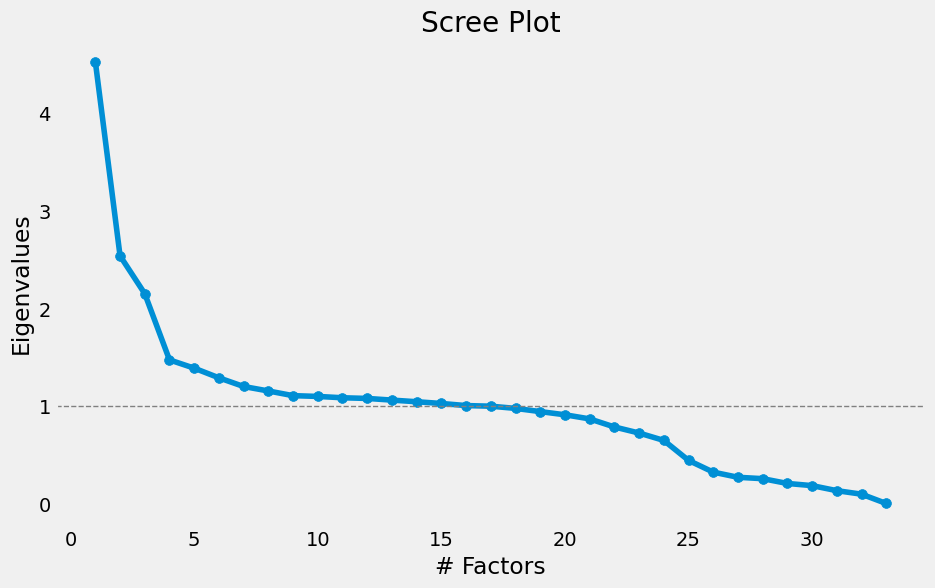

In [ ]:
# Seuil 1
n_columns = len(X.columns)
scree_plot(eigenvalues, n_columns=n_columns)

In [ ]:
number_of_factors = sum(eigenvalues > 1)
factor_model = train_factor_model(X, number_of_factors, rotation="promax") # nmber_of_factors=16

<ipython-input-17-8b1479f7c88e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([""] + variables, fontsize=10)
<ipython-input-17-8b1479f7c88e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + factors, rotation="vertical", fontsize=10)


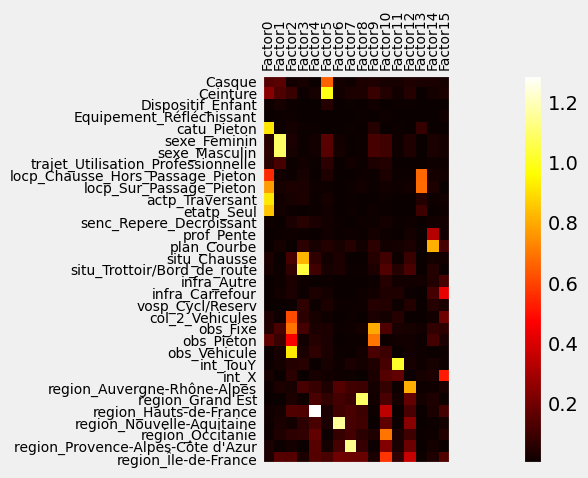

In [ ]:
loadings = factor_model.loadings_
loadings_abs = np.abs(loadings)

columns = X.columns.tolist()
loadings_plot(loadings_abs, columns)

In [ ]:
# region_Grand Est (facteur 8), region_Hauts-de-France (facteur 4), region_Nouvelle-Aquitaine (facteur 6) ces variable ont une « saturation » (factor loading) superieur a 1
#passed = list(X[loadings>1])
#saturation = X[passed]
print(pd.DataFrame(loadings, index=X.columns))

                                          0         1         2         3   \
Casque                             -0.144712  0.150195  0.016241 -0.027113   
Ceinture                           -0.244313 -0.134011  0.098311  0.001743   
Dispositif_Enfant                  -0.012038 -0.030299  0.008902 -0.003474   
Equipement_Réfléchissant            0.000613  0.004985  0.012427 -0.000656   
catu_Pieton                         0.916922  0.009455 -0.024591  0.004296   
sexe_Feminin                       -0.058191 -1.091987  0.026886 -0.004480   
sexe_Masculin                       0.059944  1.092760 -0.026191  0.004195   
trajet_Utilisation_Professionnelle -0.060252  0.120885  0.006151 -0.017058   
locp_Chausse_Hors_Passage_Pieton    0.546765  0.016129 -0.008290 -0.031379   
locp_Sur_Passage_Pieton             0.776756  0.027235  0.030822 -0.035752   
actp_Traversant                     0.917245  0.017913  0.023599 -0.039058   
etatp_Seul                          0.848188  0.021167  0.006202

In [ ]:
#regrouper les facteurs
n_factors = loadings.shape[1]
factors_list = ["Factor{}".format(index) for index in range(n_factors)]
factors = {}.fromkeys(factors_list, None)
for key in factors:
  factors[key] = []

argsmax = loadings_abs.argmax(axis=1)
for argmax, column in zip(argsmax, columns):
  factors[factors_list[argmax]].append(column)

In [ ]:
factors

{'Factor0': ['catu_Pieton',
  'locp_Sur_Passage_Pieton',
  'actp_Traversant',
  'etatp_Seul'],
 'Factor1': ['sexe_Feminin',
  'sexe_Masculin',
  'trajet_Utilisation_Professionnelle'],
 'Factor2': ['col_2_Vehicules', 'obs_Vehicule'],
 'Factor3': ['senc_Repere_Decroissant',
  'situ_Chausse',
  'situ_Trottoir/Bord_de_route',
  'vosp_Cycl/Reserv'],
 'Factor4': ['region_Hauts-de-France'],
 'Factor5': ['Casque', 'Ceinture', 'Dispositif_Enfant'],
 'Factor6': ['region_Nouvelle-Aquitaine'],
 'Factor7': ["region_Provence-Alpes-Côte d'Azur"],
 'Factor8': ['region_Grand Est'],
 'Factor9': ['obs_Fixe', 'obs_Piéton'],
 'Factor10': ['region_Occitanie', 'region_Île-de-France'],
 'Factor11': ['int_TouY'],
 'Factor12': ['region_Auvergne-Rhône-Alpes'],
 'Factor13': ['locp_Chausse_Hors_Passage_Pieton'],
 'Factor14': ['prof_Pente', 'plan_Courbe'],
 'Factor15': ['Equipement_Réfléchissant',
  'infra_Autre',
  'infra_Carrefour',
  'int_X']}

In [ ]:
X_latent = factor_model.transform(X)
#y_multiclass = np.array(y).ravel()

In [ ]:
seed=42
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_latent)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_multiclass,
                                                      test_size=0.2,
                                                      random_state=seed,
                                                      stratify=y)

In [ ]:
parametres = {"penalty": ["l1"], "C": [0.01], "solver": ["liblinear"]}
base_clf = LogisticRegression()
model = GridSearchCV(base_clf, param_grid=parametres, scoring='accuracy', cv=5, n_jobs=-1,
                         verbose=0)

model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01], 'penalty': ['l1'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.62      0.81      0.70     82337
           1       0.52      0.54      0.53     72908
           2       0.44      0.19      0.27     40134
           3       0.00      0.00      0.00      5394

    accuracy                           0.57    200773
   macro avg       0.40      0.38      0.37    200773
weighted avg       0.53      0.57      0.53    200773



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

[[66309 13533  2495     0]
 [27935 39662  5311     0]
 [11471 21039  7624     0]
 [ 1482  2125  1787     0]]


Classe prédite,0,1,2
Classe réelle,,,
0,66309,13533,2495
1,27935,39662,5311
2,11471,21039,7624
3,1482,2125,1787


In [ ]:
## Entraîner et évaluer un modèle multiclass avec les variables d'origine (sans analyse factorielle)
seed=42
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_multiclass,
                                                      test_size=0.2,
                                                      random_state=seed,
                                                      stratify=y)

In [ ]:
parametres = {"penalty": ["l1"], "C": [0.01], "solver": ["liblinear"]}
base_clf = LogisticRegression()
model = GridSearchCV(base_clf, param_grid=parametres, scoring='accuracy', cv=5, n_jobs=-1,
                         verbose=0)

model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01], 'penalty': ['l1'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.89      0.72     82337
           1       0.56      0.48      0.52     72908
           2       0.46      0.20      0.28     40134
           3       0.00      0.00      0.00      5394

    accuracy                           0.58    200773
   macro avg       0.41      0.39      0.38    200773
weighted avg       0.54      0.58      0.54    200773



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

[[73157  7011  2169     0]
 [32569 34835  5504     0]
 [13996 18091  8047     0]
 [ 1866  1748  1780     0]]


Classe prédite,0,1,2
Classe réelle,,,
0,73157,7011,2169
1,32569,34835,5504
2,13996,18091,8047
3,1866,1748,1780


In [ ]:
# Binaire classification - Analyse factorielle
seed=42
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_latent)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary,
                                                      test_size=0.2,
                                                      random_state=seed,
                                                      stratify=y)

In [ ]:
parametres = {"penalty": ["l1"], "C": [0.01], "solver": ["liblinear"]}
base_clf = LogisticRegression()
model = GridSearchCV(base_clf, param_grid=parametres, scoring='accuracy', cv=5, n_jobs=-1,
                         verbose=0)

model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01], 'penalty': ['l1'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87    155245
           1       0.55      0.17      0.27     45528

    accuracy                           0.78    200773
   macro avg       0.68      0.57      0.57    200773
weighted avg       0.74      0.78      0.73    200773



In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

[[148882   6363]
 [ 37595   7933]]


Classe prédite,0,1
Classe réelle,,
0,148882,6363
1,37595,7933


In [ ]:
## Entraîner et évaluer un modèle binary avec les variables d'origine (sans analyse factorielle)
seed=42
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary,
                                                      test_size=0.2,
                                                      random_state=seed,
                                                      stratify=y)

In [ ]:
parametres = {"penalty": ["l1"], "C": [0.01], "solver": ["liblinear"]}
base_clf = LogisticRegression()
model = GridSearchCV(base_clf, param_grid=parametres, scoring='accuracy', cv=5, n_jobs=-1,
                         verbose=0)

model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01], 'penalty': ['l1'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87    155245
           1       0.58      0.21      0.31     45528

    accuracy                           0.79    200773
   macro avg       0.69      0.58      0.59    200773
weighted avg       0.75      0.79      0.74    200773



In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

[[148226   7019]
 [ 35991   9537]]


Classe prédite,0,1
Classe réelle,,
0,148226,7019
1,35991,9537


In [ ]:
def train(X, y, grid_params, seed):

  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                      test_size=0.2,
                                                      random_state=seed,
                                                      stratify=y)

  # The models dict has same keys as grid_params
  # pointing to the grid search of each classifier
  models = {
      #"SGD": SGDClassifier(),
      "Logistic Regression": LogisticRegression()
      #"Random Forest": RandomForestClassifier(),
      #"AdaBoost": AdaBoostClassifier(),
      #"GradientBoost": GradientBoostingClassifier()
  }

  # store best estimators
  best_estimators = dict.fromkeys(models.keys())

  for model_name in models:
    base_clf = models[model_name]
    params = grid_params[model_name]

    print("[INFO] Performing Grid-Search CV ---- {}".format(model_name))
    model = GridSearchCV(base_clf, params, scoring='accuracy', cv=5, n_jobs=-1,
                         verbose=0)

    model.fit(X_train, y_train)
    best_estimators[model_name] = model.best_estimator_

  return best_estimators, X_test, y_test

In [ ]:
def evaluate_multiclass(models, X_test, y_test):
  results = pd.DataFrame(columns=["Overall Accuracy"], index=models.keys())

  for model_name, model in models.items():
    n_samples = len(y_test)
    y_pred = model.predict(X_test)

    overall_accuracy = np.sum(y_pred == y_test) / n_samples
    results.loc[model_name, :] = overall_accuracy

  return results

In [ ]:
def select_multiclass_model(models, X_test, y_test):
  best_overall_accuracy = -1
  best_model = ""
  n_samples = len(y_test)

  for model_name, model in models.items():
    y_pred = model.predict(X_test)

    overall_accuracy = np.sum(y_pred == y_test) / n_samples

    if overall_accuracy > best_overall_accuracy:
      best_overall_accuracy = overall_accuracy
      best_model = model_name

  print("{}\nOverall accuracy = {:.4f}".format(best_model, best_overall_accuracy))
  return models[best_model]

In [ ]:
grid_params_multiclass = {
   # "SGD": {
   #     "penalty": ["l1", "l2", "elasticnet"],
   #     "alpha": np.linspace(1e-5, 1e-3, 5),
   #     "learning_rate": ["optimal", "invscaling", "adaptive"],
   #     "eta0": np.linspace(1e-4, 1e-1, 5)
   # },
   #"Logistic Regression": {
   #     "penalty": ["l1", "l2"],
   #     "C": [1, 2, 4, 5],
   #     "solver": ["liblinear"]
   # }
       "Logistic Regression": {
        "penalty": ["l1"],
        "C": [0.01],
        "solver": ["liblinear"]
    }
    #"Random Forest": {
    #    "criterion": ["gini", "entropy"],
    #    "max_depth": np.linspace(3, 12, 4, dtype=np.int64),
    #    "min_samples_split": np.linspace(0.1, 0.5, 6),
    #    "min_samples_leaf": np.linspace(0.1, 0.5, 6),
    #    "max_features":["log2","sqrt"]
    #}
    #"AdaBoost": {
     #   "base_estimator": [DecisionTreeClassifier(max_depth=1),
     #                      DecisionTreeClassifier(max_depth=2),
      #                     DecisionTreeClassifier(max_depth=3)],
      #  "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1],
      #  "n_estimators": np.linspace(20, 80, 4, dtype=np.int64),
   # }
    #"GradientBoost": {
    #    "loss":["deviance"],
    #    "learning_rate": [0.01, 0.025, 0.05, 0.075],
    #    "min_samples_split": np.linspace(0.1, 0.5, 5),
    #    "min_samples_leaf": np.linspace(0.1, 0.5, 5),
    #    "max_depth":[3, 5, 8],
    #    "max_features":["log2","sqrt"],
    #    "criterion": ["friedman_mse"],
    #   "subsample":[0.5, 0.618, 0.85],
    #    "n_estimators":[5, 10, 15]
   # }
}

# Entrainer le modelle

In [ ]:
## Entraîner et évaluer un modèle multiclass avec les variables issue de l'analyse factorielle (latent)
seed = 42
estimators_multiclass_latent, X_test_latent, y_test_multiclass = train(X_latent, y_multiclass,
                                                                       grid_params_multiclass, seed)

evaluate_multiclass(estimators_multiclass_latent, X_test_latent, y_test_multiclass)

[INFO] Performing Grid-Search CV ---- Logistic Regression


,Overall Accuracy
Logistic Regression,0.565788


In [ ]:
def classification_rep(models, X_test, y_test):
  best_overall_accuracy = -1
  best_model = ""
  n_samples = len(y_test)

  for model_name, model in models.items():
    y_pred = model.predict(X_test)
    C = classification_report(y_test, y_pred)
    overall_accuracy = np.sum(y_pred == y_test) / n_samples

    if overall_accuracy > best_overall_accuracy:
      best_overall_accuracy = overall_accuracy
      best_model = model_name

  #print("{}\nOverall accuracy = {:.4f}".format(best_model, best_overall_accuracy))
  return print(C)

classifition = classification_rep(estimators_multiclass_latent, X_test_latent, y_test_multiclass)

TypeError: ignored

In [ ]:
for model_name, model in estimators_multiclass_latent.items():
    y_pred = model.predict(X_test_latent)
classification_report(y_test_multiclass, y_pred)

TypeError: ignored

In [ ]:
y_pred

array([1, 1, 0, ..., 1, 0, 2])

In [ ]:
#for model_name, model in estimators_multiclass_latent.items():
#    y_pred = model.predict(X_test_latent)
#cm = pd.crosstab(y_test_multiclass, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
#print(cm,'\n')
#estimators_multiclass_latent.items()


In [ ]:
X.shape

(1003864, 33)

In [ ]:
X_latent.shape

(2509660, 16)

In [ ]:
## Entraîner et évaluer un modèle multiclass avec les variables d'origine (sans analyse factorielle)
seed = 42
estimators_multiclass, X_test, y_test_multiclass = train(X, y_multiclass,
                                                         grid_params_multiclass,
                                                         seed)

evaluate_multiclass(estimators_multiclass, X_test, y_test_multiclass)

[INFO] Performing Grid-Search CV ---- Logistic Regression


KeyboardInterrupt: ignored

In [ ]:
def classification_report(models, X_test, y_test):
  best_overall_accuracy = -1
  best_model = ""
  n_samples = len(y_test)

  for model_name, model in models.items():
    y_pred = model.predict(X_test)
    C = classification_report(y_test, y_pred)
    overall_accuracy = np.sum(y_pred == y_test) / n_samples

    if overall_accuracy > best_overall_accuracy:
      best_overall_accuracy = overall_accuracy
      best_model = model_name

  #print("{}\nOverall accuracy = {:.4f}".format(best_model, best_overall_accuracy))
  return print(C)

classifition = classification_report(estimators_multiclass, X_test, y_test_multiclass)

In [ ]:
#def confusion_m(models, X_test, y_test):
#  best_overall_accuracy = -1
#  best_model = ""
#  n_samples = len(y_test)

#  for model_name, model in models.items():
#    y_pred = model.predict(X_test)
#    cnf_matrix = confusion_matrix(y_test, y_pred)
#    overall_accuracy = np.sum(y_pred == y_test) / n_samples

#    if overall_accuracy > best_overall_accuracy:
#      best_overall_accuracy = overall_accuracy
#      best_model = model_name

  #print("{}\nOverall accuracy = {:.4f}".format(best_model, best_overall_accuracy))
#  return print(cnf_matrix)

#cnf_matrix = confusion_m(estimators_multiclass, X_test, y_test_multiclass)

In [ ]:
#cnf_matrix = confusion_m(estimators_multiclass, X_test, y_test_multiclass)

In [ ]:
#Evaluation
#model=lr
#y_pred=model.predict(X_test)

#cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
#print(model,'\n')
#print(cm,'\n')
#report = classification_report(y_test, y_pred)
#print(report,'\n')

# Binaire classification - Analyse factorielle

In [ ]:
def evaluate_binary(models, X_test, y_test):

  results = pd.DataFrame(columns=["accuracy", "Precision", "Recall", "F1 Score"],
                         index=models.keys())

  for model_name, model in models.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.loc[model_name, :] = accuracy, precision, recall, f1

  return results

In [ ]:
# choose best models based on accuracy
def select_binary_model(models, X_test, y_test):
  best_accuracy = -1
  best_model = ""
  for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_model = model_name

  print("{}\naccuracy = {:.4f}".format(best_model, best_accuracy))
  return models[best_model]

In [ ]:
grid_params_binary = {
   # "SGD": {
   #     "penalty": ["l1", "l2", "elasticnet"],
   #     "alpha": np.linspace(1e-5, 1e-3, 5),
   #     "learning_rate": ["optimal", "invscaling", "adaptive"],
   #     "eta0": np.linspace(1e-4, 1e-1, 5)
   # },
    "Logistic Regression": {
        "penalty": ["l1"],
        "C": [0.01],
        "solver": ["liblinear"]
    }
   #    "Logistic Regression": {
   #     "penalty": ["l1", "l2"],
   #     "C": [1, 2, 4, 5],
   #     "solver": ["liblinear"]
   # }
   # "Random Forest": {
   #     "criterion": ["gini", "entropy"],
   #     "max_depth": np.linspace(3, 12, 4, dtype=np.int64),
   #     "min_samples_split": np.linspace(0.1, 0.5, 6),
   #     "min_samples_leaf": np.linspace(0.1, 0.5, 6),
   #     "max_features":["log2","sqrt"]
   # },
   # "AdaBoost": {
   #     "base_estimator": [DecisionTreeClassifier(max_depth=1),
   #                        DecisionTreeClassifier(max_depth=2),
   #                        DecisionTreeClassifier(max_depth=3)],
   #     "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1],
   #     "n_estimators": np.linspace(20, 80, 4, dtype=np.int64),
   # },
   # "GradientBoost": {
   #     "loss":["deviance"],
   #     "learning_rate": [0.01, 0.025, 0.05, 0.075],
   #     "min_samples_split": np.linspace(0.1, 0.5, 5),
   #     "min_samples_leaf": np.linspace(0.1, 0.5, 5),
   #     "max_depth":[3, 5, 8],
   #     "max_features":["log2","sqrt"],
   #     "criterion": ["friedman_mse"],
   #     "subsample":[0.5, 0.618, 0.85],
   #     "n_estimators":[5, 10, 15]
   # }
}

In [ ]:
# Entraîner et évaluer un modèle binaire avec des variables d'analyse factorielle (latent)
estimators_binary_latent, X_test_latent, y_test_binary = train(X_latent,
                                                               y_binary,
                                                               grid_params_binary,
                                                               seed)

evaluate_binary(estimators_binary_latent, X_test_latent, y_test_binary)

In [ ]:
# Entraîner et évaluer un modèle binaire avec les variables d'origine (sans analyse factorielle)
estimators_binary, X_test, y_test_binary = train(X, y_binary,
                                                 grid_params_binary,
                                                 seed)

evaluate_binary(estimators_binary, X_test, y_test_binary)